## **Clusterização com aprendizado não supervisionado**

* onde o objetivo é encontrar padrões e estruturas nos dados sem a necessidade de um rótulo de saída (y). Diversas redes neurais de aprendizado profundo podem ser usadas nesse contexto:

**1. Autoencoders:**

* **Autoencoders Variacionais (VAEs):** Uma das arquiteturas mais populares para aprendizado não supervisionado. Eles aprendem uma representação latente dos dados de entrada que pode ser usada para reconstruir os dados originais ou gerar novos dados semelhantes.
* **Autoencoders Denoisadores:** Destinados a aprender representações robustas que são resistentes ao ruído. Eles são treinados para reconstruir a entrada original a partir de uma versão corrompida da mesma.

**2. Redes Generativas Adversariais (GANs):**

* **GANs:** São compostos por um gerador (que cria novos dados) e um discriminador (que tenta distinguir entre dados reais e gerados).  O gerador é treinado para enganar o discriminador, enquanto o discriminador é treinado para identificar os dados falsos. A competição entre eles resulta em um gerador capaz de criar dados muito realistas.
* **GANs Condicionais (CGANs):** Permite condicionar a geração de dados a partir de informações adicionais, como um rótulo de classe ou uma imagem de referência.

**3. Modelos de Mistura de Densidade (Mixture Density Networks - MDNs):**

* **MDNs:** São redes neurais que aprendem uma mistura de distribuições de probabilidade. Elas podem ser usadas para modelar a distribuição de dados complexos e gerar novos dados com base nessa distribuição.

**4. Redes de Aprendizado Profundo para Clusterização:**

* **Redes de Aprendizado Profundo para Clusterização:** Diversas arquiteturas foram propostas para combinar aprendizado profundo com clusterização. Alguns exemplos incluem:
    * **Deep Embedded Clustering (DEC):**  Combina autoencoders com o algoritmo de clusterização k-means.
    * **Deep Clustering Network (DCN):**  Utiliza uma rede neural para aprender uma representação dos dados e um algoritmo de clusterização para agrupar os dados representados.

**Escolha da rede neural ideal:**

A melhor rede neural para seu problema dependerá dos seguintes fatores:

* **Natureza dos dados:** A estrutura e a dimensionalidade dos seus dados.
* **Objetivo da análise:**  O que você deseja encontrar nos dados? (e.g., grupos, padrões, representações latentes)
* **Recursos computacionais:** A capacidade de treinamento da rede.

**Recomendação:**

Experimente diferentes redes neurais e avalie seus resultados em seus dados. Você pode usar métricas de clusterização como Índice de Silhueta, Índice de Dunn ou Rand Index para avaliar a qualidade da clusterização.


**1. Deep Embedded Clustering (DEC):**

* **Conceito:**  O DEC combina a capacidade de extração de características de um autoencoder com o algoritmo de clusterização k-means.
* **Funcionamento:**
    1. **Autoencoder:** Treina um autoencoder para aprender uma representação latente compacta dos dados de entrada. Essa representação é geralmente de menor dimensionalidade que os dados originais, mas captura as informações relevantes para a clusterização.
    2. **k-means:** Aplica o algoritmo k-means na representação latente aprendida pelo autoencoder. Isso significa que os grupos (clusters) são formados com base nas representações compactas dos dados, não nos dados originais.
    3. **Atualização Iterativa:** O DEC usa uma atualização iterativa: após a clusterização com k-means, ele ajusta os pesos do autoencoder para melhorar a qualidade da representação latente em relação aos grupos encontrados.
    4. **Objetivo:** O objetivo final é encontrar uma representação latente que facilite a clusterização, ou seja, que separe os grupos de forma clara e intuitiva.

**2. Deep Clustering Network (DCN):**

* **Conceito:** O DCN usa uma rede neural para aprender a representação dos dados e um algoritmo de clusterização para agrupar a representação aprendida.  
* **Funcionamento:**
    1. **Rede Neural:** Uma rede neural, normalmente com várias camadas convolucionais ou camadas densas, é treinada para aprender uma representação dos dados.
    2. **Clusterização:** A representação aprendida pela rede neural é então usada como entrada para um algoritmo de clusterização, como k-means ou um algoritmo de clusterização hierárquica.
    3. **Objetivo:**  Similar ao DEC, o DCN visa encontrar uma representação que facilite a clusterização, mas utiliza uma rede neural mais geral para extrair as características, em vez de um autoencoder específico.

**Comparação:**

* **DEC:**
    * Utiliza um autoencoder para extrair características.
    * É mais fácil de implementar e ajustar.
    * Pode ser menos flexível que o DCN para diferentes tipos de dados.
* **DCN:**
    * Utiliza uma rede neural mais flexível para aprender a representação.
    * Pode ser mais difícil de configurar e ajustar.
    * Pode lidar com dados mais complexos.

**Aplicações:**

Tanto o DEC quanto o DCN podem ser usados para uma variedade de problemas de clusterização em áreas como:

* **Análise de imagens:**  Clusterização de imagens em diferentes categorias.
* **Análise de texto:** Clusterização de textos com base no assunto ou estilo.
* **Bioinformática:**  Clusterização de dados genéticos ou proteômicos.

A escolha entre DEC e DCN dependerá das características específicas dos seus dados e do objetivo da análise.

## Explicação do Código

```python
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
```
- **Importações**: Importa as bibliotecas necessárias. `tensorflow` e `keras` são usados para construir e treinar a rede neural. `sklearn` é usado para carregar o conjunto de dados e realizar a clusterização. `matplotlib` é usado para visualização.

```python
# Carrega o conjunto de dados MNIST
digits = load_digits()
X = digits.data
y_true = digits.target
```
- **Carregamento dos Dados**: Carrega o conjunto de dados MNIST de dígitos. `X` contém as imagens dos dígitos e `y_true` contém os rótulos verdadeiros.

```python
# Define o autoencoder
def build_autoencoder():
    encoder = keras.Sequential(
        [
            layers.Dense(128, activation='relu', input_shape=(64,)),
            layers.Dense(64, activation='relu'),
            layers.Dense(32, activation='relu'),
        ]
    )

    decoder = keras.Sequential(
        [
            layers.Dense(64, activation='relu', input_shape=(32,)),
            layers.Dense(128, activation='relu'),
            layers.Dense(64, activation='sigmoid')
        ]
    )

    return encoder, decoder
```
- **Definição do Autoencoder**: Define duas partes do autoencoder: o encoder e o decoder.
  - **Encoder**: Três camadas densas com 128, 64 e 32 neurônios, respectivamente, todas com ativação ReLU. A função do encoder é reduzir a dimensionalidade dos dados de entrada.
  - **Decoder**: Três camadas densas com 64, 128 e 64 neurônios, respectivamente. As duas primeiras camadas usam ativação ReLU e a última usa ativação sigmoid. A função do decoder é reconstruir os dados de entrada a partir da representação latente.

```python
# Cria o autoencoder
encoder, decoder = build_autoencoder()

# Define a entrada do autoencoder
input_data = keras.Input(shape=(64,))
encoded = encoder(input_data)
decoded = decoder(encoded)

# Cria o modelo autoencoder
autoencoder = keras.Model(inputs=input_data, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(X, X, epochs=10)
```
- **Criação e Treinamento do Autoencoder**:
  - **Entrada**: Define a entrada do autoencoder com 64 características.
  - **Encoder e Decoder**: Passa a entrada pelo encoder para obter a representação latente e depois pelo decoder para reconstruir os dados.
  - **Modelo**: Cria o modelo autoencoder, compila com o otimizador Adam e a função de perda binary crossentropy, e treina o modelo com os dados de entrada.

```python
# Extrai a representação latente
latent_space = encoder.predict(X)
```
- **Extração da Representação Latente**: Usa o encoder treinado para obter a representação latente dos dados de entrada.

```python
# Aplica k-means na representação latente
kmeans = KMeans(n_clusters=10, random_state=0)
y_pred = kmeans.fit_predict(latent_space)
```
- **Clusterização com K-Means**: Aplica o algoritmo K-Means na representação latente para agrupar os dados em 10 clusters.

```python
# Avalia o cluster
silhouette_avg = silhouette_score(latent_space, y_pred)
print("Silhouette Score:", silhouette_avg)
```
- **Avaliação dos Clusters**: Calcula o Silhouette Score para avaliar a qualidade dos clusters formados.

```python
# Visualiza os clusters
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[y_pred == i][0].reshape(8, 8), cmap='gray')
    plt.title("Cluster {}".format(i))
plt.tight_layout()
plt.show()
```
- **Visualização dos Clusters**: Plota as imagens dos dígitos agrupados por cluster.

### Valores Padrão nas Camadas

- **Número de Neurônios**: Os valores 128, 64 e 32 foram escolhidos para reduzir gradualmente a dimensionalidade dos dados. Esses valores podem ser ajustados dependendo da complexidade dos dados e do objetivo do modelo.
- **Ativação ReLU**: Usada nas camadas intermediárias para introduzir não-linearidade e permitir que a rede aprenda representações complexas.
- **Ativação Sigmoid**: Usada na última camada do decoder para garantir que as saídas estejam no intervalo [0, 1], adequado para dados normalizados.

Esses valores são um bom ponto de partida, mas podem ser ajustados com base em experimentação e validação para obter melhores resultados.



## 1. Deep Embedded Clustering (DEC) com minist

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Input
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [2]:
# Carrega o conjunto de dados MNIST
digits = load_digits()
X = digits.data
y_true = digits.target

In [3]:

# Define o autoencoder
def build_autoencoder():
    encoder = keras.Sequential(
        [
            layers.Input(shape=(64,)),
            layers.Dense(128, activation='relu'),
            layers.Dense(64, activation='relu'),
            layers.Dense(32, activation='relu'),
        ]
    )

    decoder = keras.Sequential(
        [
            layers.Input(shape=(32,)),
            layers.Dense(64, activation='relu'),
            layers.Dense(128, activation='relu'),
            layers.Dense(64, activation='sigmoid')
        ]
    )

    return encoder, decoder

In [4]:

# Cria o autoencoder
encoder, decoder = build_autoencoder()

In [5]:
# Define a entrada do autoencoder
input_data = keras.Input(shape=(64,))
encoded = encoder(input_data)
decoded = decoder(encoded)

O uso de `model.fit(X, X)` em sua rotina de treinamento de um autoencoder é uma prática comum. Aqui está o porquê:

1. **Autoencoders**: São redes neurais usadas para aprender representações eficientes dos dados, geralmente para redução de dimensionalidade ou para aprendizado não supervisionado. Eles consistem em duas partes: um codificador que mapeia a entrada para uma representação latente e um decodificador que reconstrói a entrada original a partir dessa representação latente.

2. **Treinamento**: Durante o treinamento de um autoencoder, o objetivo é que a saída (reconstruída) seja o mais próxima possível da entrada original. Portanto, você usa os mesmos dados como entrada e saída (`X, X`). Isso força a rede a aprender a codificar e decodificar os dados de forma eficiente.

3. **Dataset MNIST**: O MNIST é um conjunto de dados popular que contém imagens de dígitos manuscritos. É frequentemente usado para treinar e testar modelos de aprendizado de máquina, incluindo autoencoders.



In [6]:
# Cria o modelo autoencoder
autoencoder = keras.Model(inputs=input_data, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['mae'])
history = autoencoder.fit(X, X, epochs=10)

Epoch 1/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: -1193.7522 - mae: 4.7499
Epoch 2/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: -902636.2500 - mae: 4.6191
Epoch 3/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: -60490476.0000 - mae: 4.6008
Epoch 4/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: -1060746944.0000 - mae: 4.6335
Epoch 5/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: -8474304512.0000 - mae: 4.6288
Epoch 6/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: -41681059840.0000 - mae: 4.6191
Epoch 7/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: -150503555072.0000 - mae: 4.6312
Epoch 8/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: -430958936064.0000 - mae: 4.6077
Epoch 9/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: -1063558578176.0000 - mae: 4.6219
Epoch 10/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: -2303694209024.0000 - mae: 4.6027


In [ ]:
# Extrai a representação latente
latent_space = encoder.predict(X)

In [ ]:
# Aplica k-means na representação latente
kmeans = KMeans(n_clusters=10, random_state=0)
y_pred = kmeans.fit_predict(latent_space)

Epoch 1/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: -1558.2845
Epoch 2/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: -1045862.5000
Epoch 3/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: -67583000.0000
Epoch 4/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: -1146842368.0000
Epoch 5/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: -9021174784.0000
Epoch 6/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: -43924119552.0000
Epoch 7/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: -156672851968.0000
Epoch 8/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: -451003121664.0000
Epoch 9/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: -1099777703936.0000
Epoch 10/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: -2400292700160.0000
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score: 0.52552205


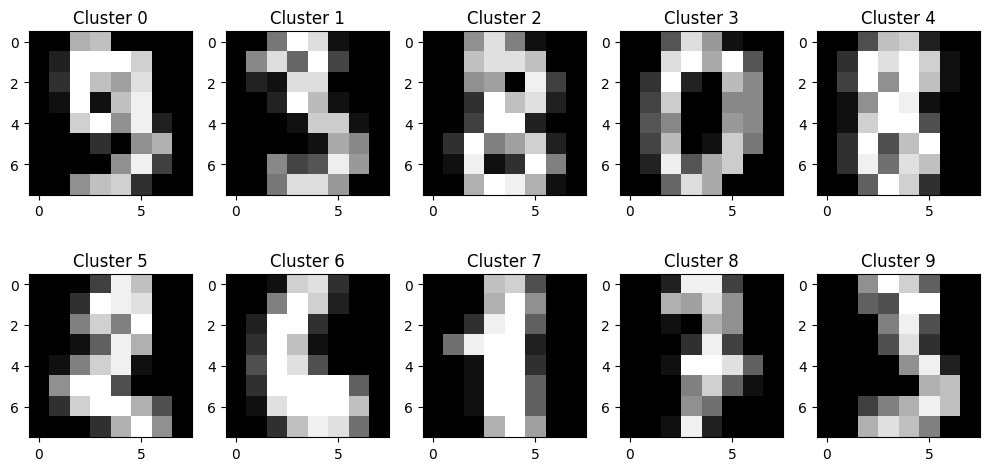

In [ ]:
# Avalia o cluster
silhouette_avg = silhouette_score(latent_space, y_pred)
print("Silhouette Score:", silhouette_avg)

# Visualiza os clusters
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[y_pred == i][0].reshape(8, 8), cmap='gray')
    plt.title("Cluster {}".format(i))
plt.tight_layout()
plt.show()


## Características da Rede Neural

1. **Autoencoder**: A rede que você construiu é um autoencoder, que é um tipo de rede neural usada para aprender uma representação (codificação) eficiente dos dados de entrada, normalmente para redução de dimensionalidade ou aprendizado de características.

2. **Arquitetura**:
   - **Encoder**: Composto por três camadas densas (128, 64 e 32 neurônios) com ativação ReLU. Ele reduz a dimensionalidade dos dados de entrada (64 características) para uma representação latente de 32 características.
   - **Decoder**: Também composto por três camadas densas (64, 128 e 64 neurônios) com ativação ReLU e sigmoid. Ele reconstrói os dados de entrada a partir da representação latente.

3. **Treinamento**: O autoencoder é treinado para minimizar a perda de reconstrução (binary crossentropy), ou seja, a diferença entre os dados de entrada e a sua reconstrução.

### Uso para Clusterização

Sim, você pode usar essa rede para clusterização, especialmente quando não tem os rótulos (y) dos dados. Aqui está como isso funciona:

1. **Extração de Padrões**: O encoder aprende uma representação compacta e significativa dos dados de entrada. Essa representação latente pode capturar padrões e características importantes dos dados.

2. **Clusterização**: Após treinar o autoencoder, você pode usar a representação latente (saída do encoder) como entrada para algoritmos de clusterização, como o K-Means. Isso é útil porque a representação latente geralmente tem uma dimensionalidade menor e pode ser mais adequada para identificar clusters.

3. **Sem Rótulos**: Mesmo sem os rótulos, o autoencoder pode aprender a estrutura dos dados. A clusterização na representação latente pode revelar grupos naturais ou padrões nos dados, que podem ser interpretados posteriormente.

### Exemplo Prático

No seu código, você usou o K-Means na representação latente para agrupar os dados. O Silhouette Score que você obteve é uma medida de quão bem os clusters foram formados. Um valor mais alto indica que os clusters são bem definidos.



# DEC com dados sintéticos

## Explicação do Código

1. **Geração de Dados Sintéticos**:
   ```python
   np.random.seed(0)
   X = np.random.rand(1000, 64)
   ```
   - Gera um conjunto de dados sintéticos com 1000 linhas e 64 características, com valores aleatórios entre 0 e 1.

2. **Definição do Autoencoder**:
   - **Encoder**: Três camadas densas com 128, 64 e 32 neurônios, respectivamente, todas com ativação ReLU.
   - **Decoder**: Três camadas densas com 64, 128 e 64 neurônios, respectivamente. As duas primeiras camadas usam ativação ReLU e a última usa ativação sigmoid.

3. **Criação e Treinamento do Autoencoder**:
   - Define a entrada do autoencoder, passa a entrada pelo encoder e depois pelo decoder.
   - Compila o modelo com o otimizador Adam e a função de perda binary crossentropy.
   - Treina o modelo com os dados sintéticos.

4. **Extração da Representação Latente**:
   - Usa o encoder treinado para obter a representação latente dos dados de entrada.

5. **Clusterização com K-Means**:
   - Aplica o algoritmo K-Means na representação latente para agrupar os dados em 10 clusters.

6. **Avaliação e Visualização dos Clusters**:
   - Calcula o Silhouette Score para avaliar a qualidade dos clusters formados.
   - Plota as imagens dos dados agrupados por cluster.



Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.6929 - val_loss: 0.6912
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6891 - val_loss: 0.6847
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6804 - val_loss: 0.6763
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6714 - val_loss: 0.6704
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6644 - val_loss: 0.6653
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6592 - val_loss: 0.6607
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6531 - val_loss: 0.6573
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6490 - val_loss: 0.6540
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6461 - val_loss: 0.6521
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6430 - val_loss: 0.6490
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Silhouette Score: 0.048743013
   feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0   0.548814   0.7

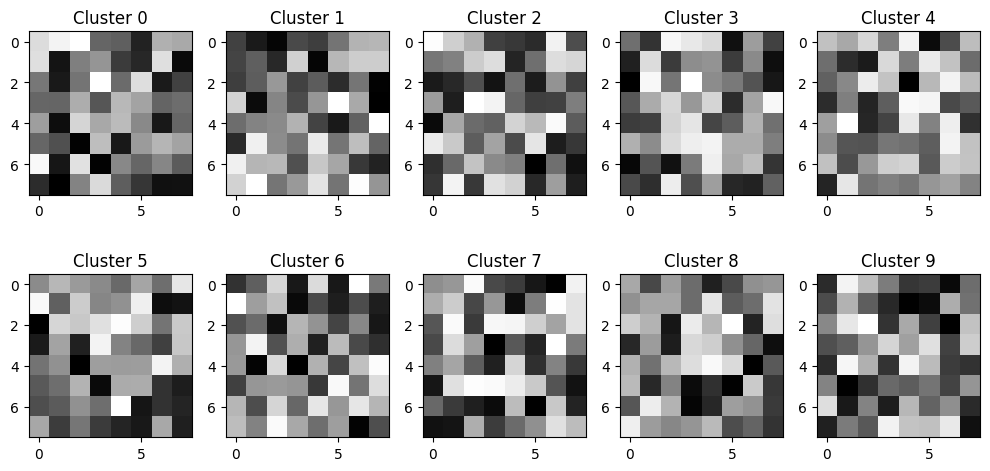

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Input
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Gera dados sintéticos
np.random.seed(0)
X = np.random.rand(1000, 64)

# Define o autoencoder
def build_autoencoder():
    encoder = keras.Sequential(
        [
            layers.Input(shape=(64,)),
            layers.Dense(128, activation='relu'),
            layers.Dense(64, activation='relu'),
            layers.Dense(32, activation='relu')
        ]
    )

    decoder = keras.Sequential(
        [
            layers.Input(shape=(32,)),
            layers.Dense(64, activation='relu'),
            layers.Dense(128, activation='relu'),
            layers.Dense(64, activation='sigmoid')
        ]
    )

    return encoder, decoder

# Cria o autoencoder
encoder, decoder = build_autoencoder()

# Define a entrada do autoencoder
input_data = keras.Input(shape=(64,))
encoded = encoder(input_data)
decoded = decoder(encoded)

# Cria o modelo autoencoder
autoencoder = keras.Model(inputs=input_data, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metric='mae', 'mse')
autoencoder.fit(X, X, epochs=10, batch_size=32, validation_split=0.2)

# Extrai a representação latente
latent_space = encoder.predict(X)

# Aplica k-means na representação latente
kmeans = KMeans(n_clusters=10, random_state=0, n_init='auto')
y_pred = kmeans.fit_predict(latent_space)

# Avalia o cluster
silhouette_avg = silhouette_score(latent_space, y_pred)
print("Silhouette Score:", silhouette_avg)

# Cria um DataFrame com os dados originais
df = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(X.shape[1])])

# Adiciona a coluna dos clusters
df['cluster'] = y_pred

# Visualiza os primeiros registros do DataFrame
print(df.head())


# Visualiza os clusters
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[y_pred == i][0].reshape(8, 8), cmap='gray')
    plt.title("Cluster {}".format(i))
plt.tight_layout()
plt.show()


## Explicação do Código

1. **Geração de Dados Sintéticos**:
   - Gera um conjunto de dados sintéticos com 1000 linhas e 64 características.

2. **Definição e Treinamento do Autoencoder**:
   - Define e treina o autoencoder para aprender uma representação latente dos dados.

3. **Clusterização com K-Means**:
   - Aplica o algoritmo K-Means na representação latente para agrupar os dados em 10 clusters.

4. **Criação do DataFrame**:
   - Cria um DataFrame `df` com os dados originais e adiciona uma nova coluna `cluster` com os rótulos dos clusters encontrados.

5. **Visualização dos Clusters**:
   - Plota as imagens dos dados agrupados por cluster.

Esse código adiciona uma coluna ao DataFrame com os nomes dos clusters encontrados, permitindo que você veja a qual cluster cada linha de dados pertence.

# Autoencoder Convolucional com fashion minist

### Características:

1. **Arquitetura**:
   - **Codificador (Encoder)**: Esta parte da rede reduz a dimensionalidade dos dados de entrada, extraindo características importantes. No exemplo, usamos camadas convolucionais e de pooling para reduzir a dimensão espacial das imagens.
   - **Decodificador (Decoder)**: Esta parte reconstrói os dados de entrada a partir da representação comprimida gerada pelo codificador. Utilizamos camadas convolucionais e de upsampling para aumentar a dimensão espacial das imagens de volta ao tamanho original.

2. **Camadas Convolucionais**:
   - As camadas convolucionais aplicam filtros (kernels) às imagens de entrada para extrair características como bordas, texturas e padrões.
   - No exemplo, usamos camadas `Conv2D` com diferentes números de filtros e tamanhos de kernel.

3. **Pooling e Upsampling**:
   - **Pooling**: Reduz a dimensão espacial das imagens, mantendo as características mais importantes. Usamos `MaxPooling2D` para isso.
   - **Upsampling**: Aumenta a dimensão espacial das imagens, essencial para a reconstrução no decodificador. Usamos `UpSampling2D`.

4. **Função de Perda e Métricas**:
   - **Perda**: Usamos `binary_crossentropy`, que é adequada para problemas de reconstrução de imagens binárias ou normalizadas.
   - **Métricas**: Usamos `mae` (erro absoluto médio) para monitorar a performance do modelo.

### Funcionamento:

- **Treinamento**: O autoencoder é treinado para minimizar a diferença entre a entrada e a saída, ou seja, para que a saída reconstruída seja o mais próxima possível da entrada original.
- **Aplicações**: Autoencoders são usados para compressão de dados, redução de dimensionalidade, remoção de ruído, e até mesmo para geração de novos dados.



In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Carrega o conjunto de dados Fashion MNIST
(X_train, _), (X_test, _) = keras.datasets.fashion_mnist.load_data()
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

A adição de uma dimensão extra para canais é necessária quando trabalhamos com redes neurais convolucionais (CNNs) porque essas redes esperam que os dados de entrada tenham uma estrutura específica.


1. **Formato dos Dados**: As CNNs geralmente esperam que os dados de entrada estejam no formato `(número de amostras, altura, largura, número de canais)`. Para imagens em escala de cinza, como as do MNIST e Fashion MNIST, o número de canais é 1. Para imagens coloridas (RGB), o número de canais seria 3.

2. **Dimensão Extra**: Quando você carrega os dados do MNIST ou Fashion MNIST, eles vêm no formato `(número de amostras, altura, largura)`, sem a dimensão do canal. Adicionando `[..., tf.newaxis]`, você transforma o formato para `(número de amostras, altura, largura, 1)`, que é o formato esperado pelas camadas convolucionais.

3. **Exemplo**:
   - **Antes**: `X_train.shape` pode ser `(60000, 28, 28)`.
   - **Depois**: `X_train[..., tf.newaxis].shape` será `(60000, 28, 28, 1)`.



In [ ]:
# Adiciona uma dimensão extra para canais (necessário para a rede convolucional)
X_train = X_train[..., tf.newaxis]
X_test = X_test[..., tf.newaxis]

In [ ]:
# Define a arquitetura do autoencoder
input_data = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_data)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

In [ ]:
# Cria o modelo autoencoder
autoencoder = keras.Model(inputs=input_data, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['mae'])

### **Demora um pouco**

In [7]:
# Treina o autoencoder com os dados de entrada sendo iguais aos dados de saída
history = autoencoder.fit(X_train, X_train, epochs=10, batch_size=256, validation_data=(X_test, X_test))


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 225s 942ms/step - loss: 0.3692 - mae: 0.1342 - val_loss: 0.2796 - val_mae: 0.0578
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 252s 902ms/step - loss: 0.2742 - mae: 0.0533 - val_loss: 0.2715 - val_mae: 0.0487
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 209s 890ms/step - loss: 0.2686 - mae: 0.0473 - val_loss: 0.2675 - val_mae: 0.0441
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 209s 890ms/step - loss: 0.2648 - mae: 0.0434 - val_loss: 0.2648 - val_mae: 0.0414
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 209s 887ms/step - loss: 0.2623 - mae: 0.0403 - val_loss: 0.2617 - val_mae: 0.0379
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 266s 908ms/step - loss: 0.2590 - mae: 0.0375 - val_loss: 0.2601 - val_mae: 0.0363
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 258s 893ms/step - loss: 0.2578 - mae: 0.

In [8]:
# Função para plotar imagens originais e reconstruídas
def plot_results(original, reconstructed, n=10):
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # Imagens originais
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(original[i].reshape(28, 28), cmap='gray')
        plt.title("Original")
        plt.axis('off')

        # Imagens reconstruídas
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(reconstructed[i].reshape(28, 28), cmap='gray')
        plt.title("Reconstructed")
        plt.axis('off')
    plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step


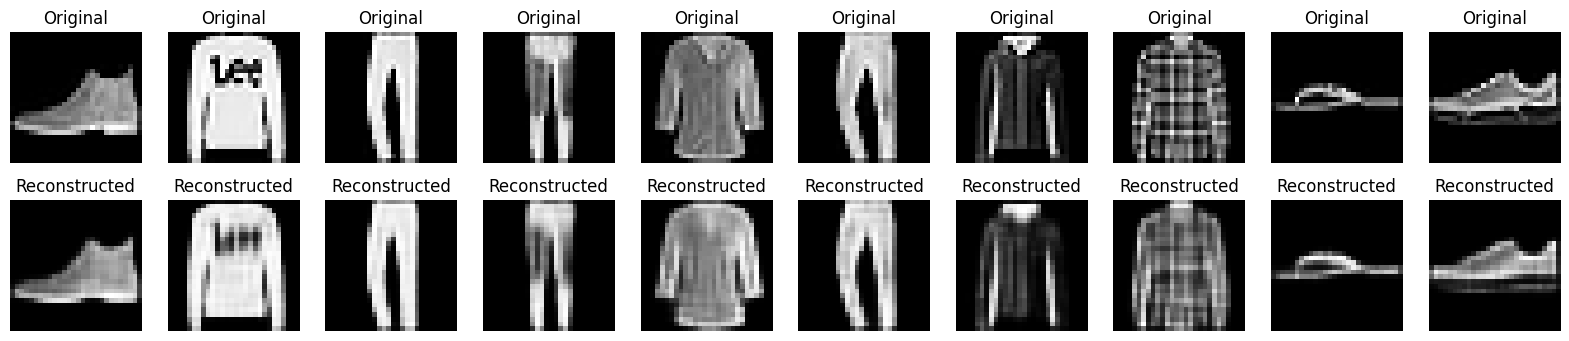

In [9]:
# Reconstrói as imagens de teste
reconstructed_images = autoencoder.predict(X_test)

# Plota os resultados
plot_results(X_test, reconstructed_images)

In [11]:
import matplotlib.pyplot as plt

# Função para plotar a perda (loss) durante o treinamento
def plot_loss(history):
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.show()

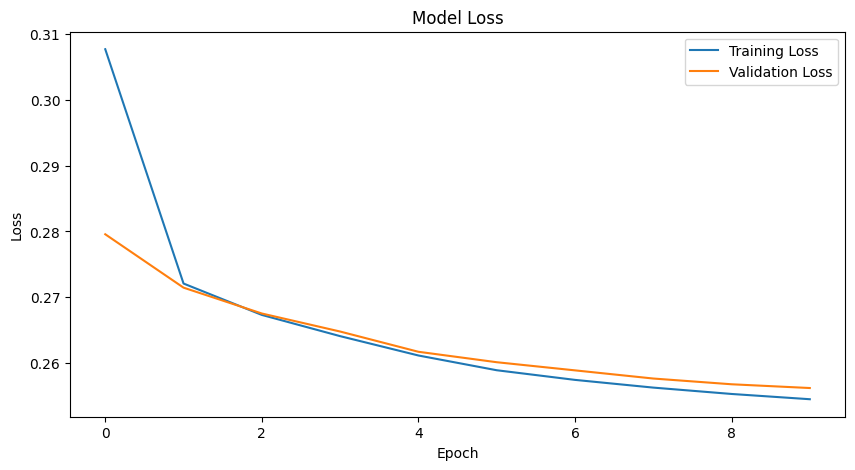

In [12]:
# Plota a perda (loss) durante o treinamento
plot_loss(history)

## Diferenças Principais

- **Autoencoder Convolucional**: Focado na reconstrução dos dados de entrada, útil para tarefas como redução de ruído e compressão de dados.
- **DEC**: Focado em encontrar uma representação latente que facilite o agrupamento dos dados em clusters significativos.

